In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [22]:
import h5py
import cv2
import numpy as np
import os
from pathlib import Path
from tensorflow.keras.preprocessing.image import img_to_array

In [5]:
root = '/content/gdrive/MyDrive/project-art/datasets/temp/train_2/'

In [46]:
images = []
labels = []
for name in os.listdir(root)[:20]:
  image_path = os.path.join(root, name)
  image = cv2.imread(image_path)
  image = cv2.resize(image, (128, 128))
  image = img_to_array(image)
  images.append(image)
  if 'impressionism' in name:
    labels.append(0)
  else:
    labels.append(1)

In [20]:
# os.chdir('/')

PosixPath('/content/gdrive/MyDrive/project-art/datasets/temp')

In [49]:
num_images = len(images)

with h5py.File("train_2.hdf5", "w") as file:
    dataset = file.create_dataset(
        "images", np.shape(images), h5py.h5t.STD_U8BE, data=images
    )
    meta_set = file.create_dataset(
        "meta", np.shape(labels), h5py.h5t.STD_U8BE, data=labels
    )

In [50]:
# image = np.array(file["/images"]).astype("uint8"))
# label = int(np.array(file["/meta"]).astype("uint8"))
images = None
labels = None

with h5py.File('train_2.hdf5', 'r') as file:
    # Open the HDF5 file
    images = np.array(file["/images"]).astype("uint8")
    labels = np.array(file["/meta"]).astype("uint8")

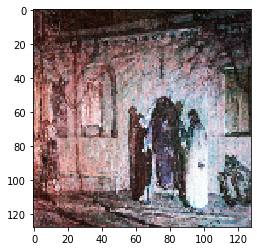

In [52]:
from PIL import Image

from matplotlib import pyplot as plt
plt.imshow(images[0], interpolation='nearest')
plt.show()